In [1]:
# Atul Bharati
# AOSC247 Final Project: Autonomous Vehicle Survey of Public Bicyclists and Pedestrians in Pittsburgh, 2017

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Reads in dataset
public_dataset = pd.read_csv('bikepghpublic.csv', index_col='Response ID')

# Consider only completed surveys 
public_dataset = public_dataset[public_dataset['Status'] == 'COMPLETE']
# Consider participants who are confident that they have interacted with AVs before
public_dataset = public_dataset.drop(public_dataset[(public_dataset['InteractPedestrian'] == 'No') &
                                                    (public_dataset['InteractBicycle'] == 'No')].index)
public_dataset = public_dataset.drop(public_dataset[(public_dataset['InteractPedestrian'] == 'Not sure') &
                                                    (public_dataset['InteractBicycle'] == 'Not sure')].index)
# Remove columns that are irrelevant to this analysis
public_dataset = public_dataset.drop(columns=['Status', 'Start Date', 'End Date', 'Source Type', 'RegulationTesting',
                                              'RegulationShareData', 'AdvocacyIssues', 'ZipCode'])
public_dataset

,InteractPedestrian,InteractBicycle,CircumstancesCoded,FeelingsProvingGround,SafetyHuman,SafetyAV,AVSafetyPotential,RegulationSpeed,RegulationSchoolZone,BikePghPosition,PayingAttentionAV,FamiliarityTechnoology
Response ID,,,,,,,,,,,,
260279884,No,Yes,9.0,Approve,2,4,Yes,Not sure,Not sure,Neither Support nor Oppose,To some extent,Mostly Unfamiliar
260293425,Yes,Yes,9.0,Disapprove,2,1,No,No,No,Actively Oppose,To a moderate extent,Somewhat familiar
260293589,No,Yes,9.0,Disapprove,2,2,Not sure,Not sure,Yes,Neither Support nor Oppose,To little extent,Somewhat familiar
260335956,No,Yes,9.0,Somewhat Approve,4,4,Maybe,Yes,No,Actively Support,To little extent,Mostly Unfamiliar
260336053,Yes,Yes,9.0,Approve,2,5,Yes,No,Yes,Actively Support,To a large extent,Extremely familiar
260337614,Yes,Yes,9.0,Somewhat Approve,3,2,Yes,No,No,Actively Support,To some extent,Mostly Unfamiliar
260338089,No,Yes,9.0,Somewhat Approve,3,No experience,Yes,Yes,Yes,Neither Support nor Oppose,To some extent,Somewhat familiar
260348627,No,Yes,9.0,Somewhat Approve,4,No experience,Not sure,Yes,No,Neither Support nor Oppose,To some extent,Not familiar at all
260351228,No,Yes,9.0,Approve,2,5,Yes,Yes,No,Actively Support,To some extent,Not familiar at all


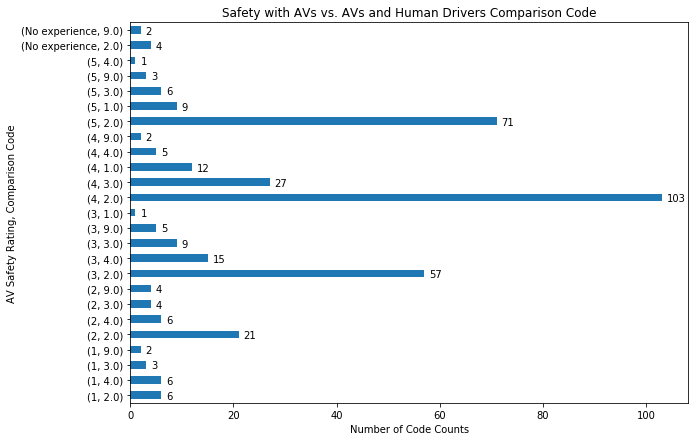

In [4]:
plt.figure(figsize=(10, 7))
# Counts the number of codes for each safety AV rating group
code_counts = public_dataset.groupby(['SafetyAV'])['CircumstancesCoded'].value_counts()
code_counts_plot = code_counts.plot(kind='barh')
# Plot labels
plt.title('Safety with AVs vs. AVs and Human Drivers Comparison Code')
plt.xlabel('Number of Code Counts')
plt.ylabel('AV Safety Rating, Comparison Code')
# Displays the code counts for each safety AV rating, code combination
for index, count in enumerate(code_counts.values):
    plt.text(count+1, index-0.25, str(count))

(0.24284439246583606, 2.9403699372153125)


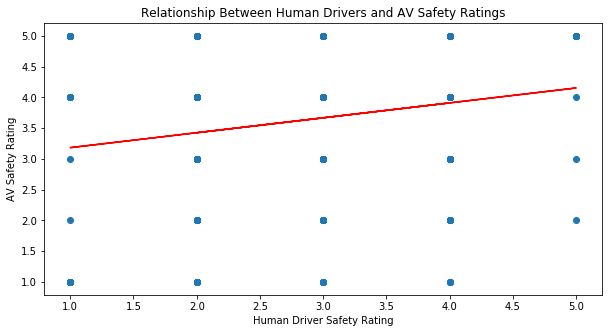

In [5]:
# Only includes numeric ratings
df2 = public_dataset[np.logical_and(public_dataset['SafetyHuman'] != 'No experience',
                                    public_dataset['SafetyAV'] != 'No experience')]
x = df2['SafetyHuman'].astype(float).values
y = df2['SafetyAV'].astype(float).values
# Scatter plot with labels
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.title('Relationship Between Human Drivers and AV Safety Ratings')
plt.xlabel('Human Driver Safety Rating')
plt.ylabel('AV Safety Rating')

# Draws the regression line
# m = slope, b = y-intercept
m, b = np.polyfit(x, y, 1)
print (m,b)

# Calculates y = mx + b for each point and then creates regression line
yvals = []
index = 0
for value in y:
    yvals.append(m * x[index] + b)
    index += 1
plt.plot(x, yvals, 'r')
plt.show()

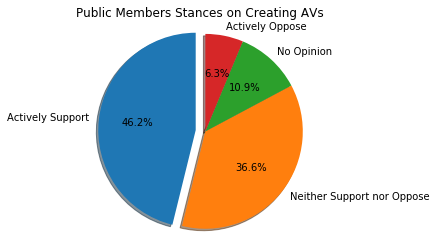

In [6]:
# Extracts frequncies for each stance
AV_positions = public_dataset['BikePghPosition'].value_counts()
labels = list(AV_positions.index)
frequencies = list(AV_positions.values)

# Creates pie chart showing number of members for each position
explode = [0.1, 0, 0, 0]
fig, ax = plt.subplots()
ax.pie(frequencies, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Public Members Stances on Creating AVs')
plt.show()

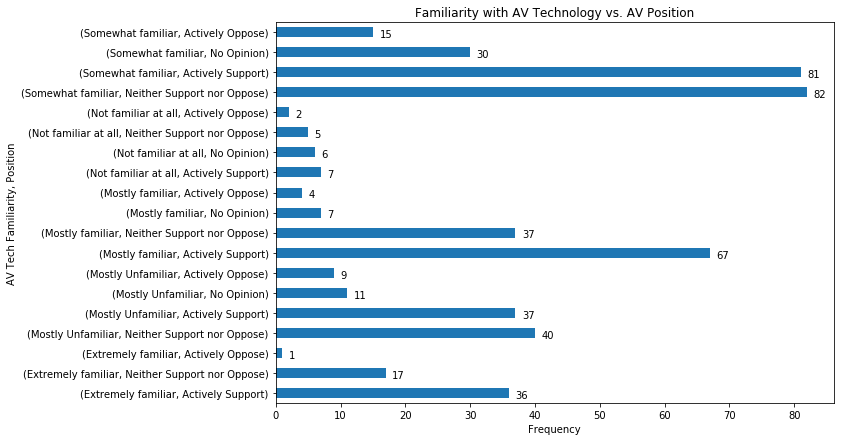

In [7]:
plt.figure(figsize=(10, 7))
# Counts the number of members for each position for each familiarity group
counts = public_dataset.groupby(['FamiliarityTechnoology'])['BikePghPosition'].value_counts()
counts_plot = counts.plot(kind='barh')
# Plot labels
plt.title('Familiarity with AV Technology vs. AV Position')
plt.xlabel('Frequency')
plt.ylabel('AV Tech Familiarity, Position')
# Displays the frequencies for each familiarity, position combination
for index, count in enumerate(counts.values):
    plt.text(count+1, index-0.25, str(count))